In [1]:
import sys
sys.path.append("../model/active_contour/")
sys.path.append("../utils/")

import cv2
import numpy as np
from scipy.interpolate import splprep, splev

import matplotlib.pyplot as plt

from contour import getContour
from snake import Snake

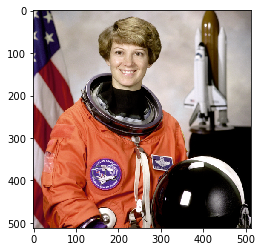

In [2]:
# Load sample image
imsample_astronaut= cv2.imread("../asset/astronaut.png").astype(np.uint8)

plt.imshow(imsample_astronaut[:, :, ::-1])

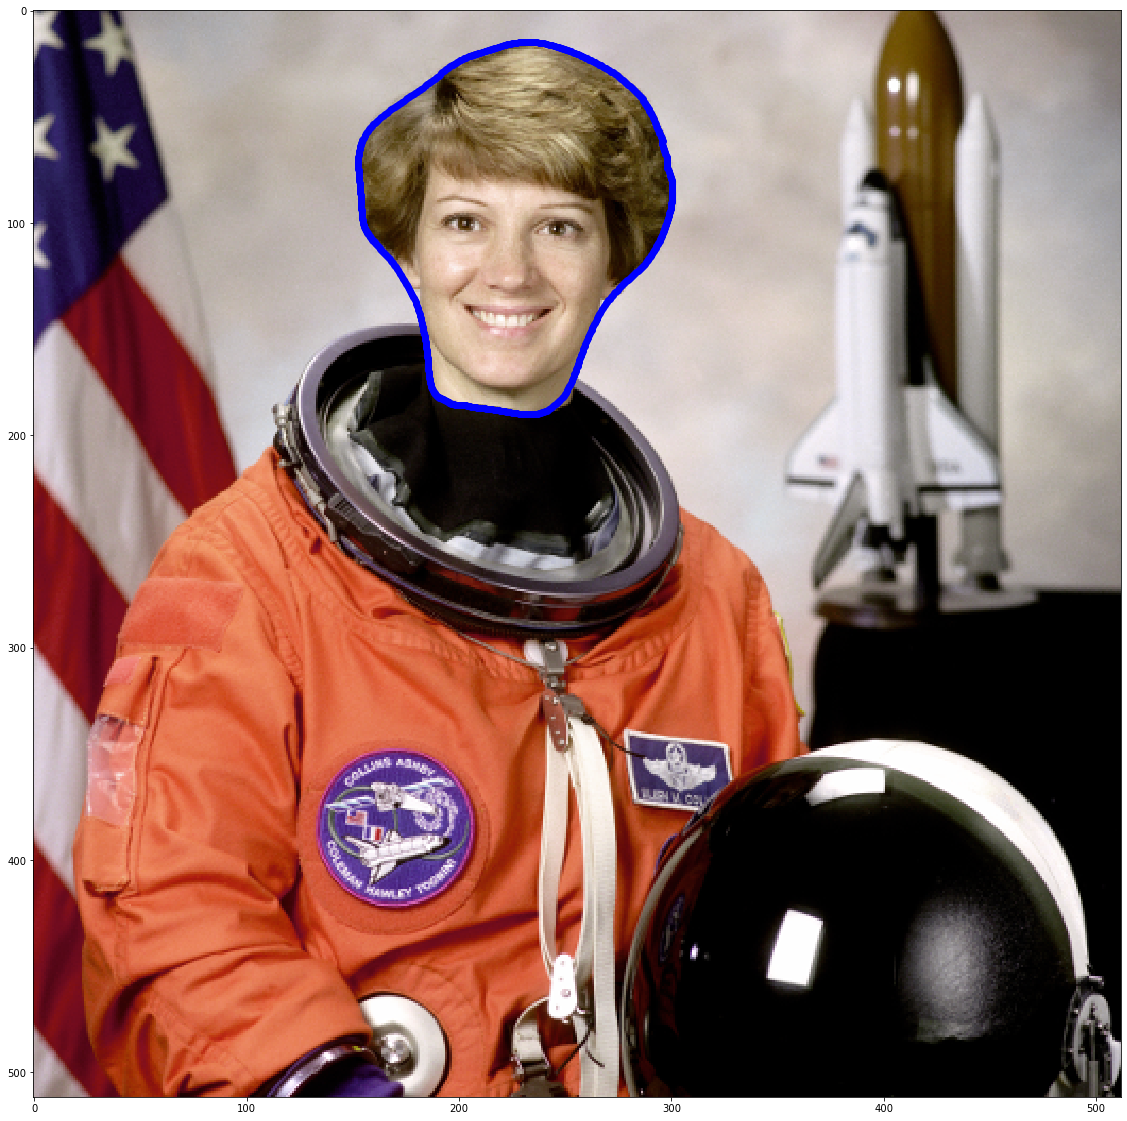

In [3]:
## Snake model

# Add seed points
seed = np.zeros_like(imsample_astronaut[..., 0])
seed[10:200, 150:310] = 1

# Define model
model = Snake(alpha=0.015, beta=10, gamma=0.001, maxIter=1000)

# Run
region, contour = model.run(cv2.GaussianBlur(imsample_astronaut[..., 0], (7, 7), 2), seed)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
axes.scatter(contour[:, 1], contour[:, 0], color="blue")
axes.plot(contour[:, 1], contour[:, 0], color="blue")
axes.imshow(imsample_astronaut[..., ::-1])